In [1]:
#Regression → Predict continuous values (e.g., house prices).
#Algorithms: Linear Regression, Decision Tree Regression, Random Forest Regression

In [2]:
#From here we are learning Regression algorithm

#Linear Regression model Linear Regression is used to predict numbers — not categories like yes/no. 
#It finds a straight line that best fits the data gives predictions like 0.23, 0.78, 0.45 — not exactly 0 or 1.But we want to predict "Churn or Not Churn", which is either 0 or 1.
#So, we convert those numbers:
#If the prediction is greater than or equal to 0.5, we say 1 (Yes, churn).
#If it’s less than 0.5, we say 0 (No churn).

#Evaluation Metrics
#1. mean_squared_error(y_test, y_pred_continuous)
#Measures how far off the predicted numbers are from the actual 0 or 1 values.It calculates the average of the squares of the prediction errors.
#Lower value = better.

#2. r2_score(y_test, y_pred_continuous)
#Tells how well the predictions explain the actual results.Score ranges from 0 to 1 (can even be negative if very bad).
#1 means perfect match, 0 means no predictive power.

#3. accuracy_score(y_test, y_pred_binary)
#After converting predictions to 0 or 1, this shows how many predictions were correct.
#Accuracy = (Correct Predictions / Total Predictions) × 100
#Example: If 800 out of 1000 are correct → accuracy is 80%

#LinearRegression tries to fit a line and outputs continuous values between 0 and 1 (and sometimes outside that).
#We threshold the result at 0.5 to convert it to 0 or 1.
#For better performance in binary classification, use LogisticRegression.



C:\Users\HP\AppData\Local\Temp\ipykernel_15196\33380937.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['country'] = df['country'].replace({'Germany': 0, 'France': 1, 'Spain': 2})#Convert categorical columns
C:\Users\HP\AppData\Local\Temp\ipykernel_15196\33380937.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})


Mean Squared Error: 0.133650692302136
R² Score: 0.15350815815580354
Accuracy Score (after rounding): 80.80000000000001 %


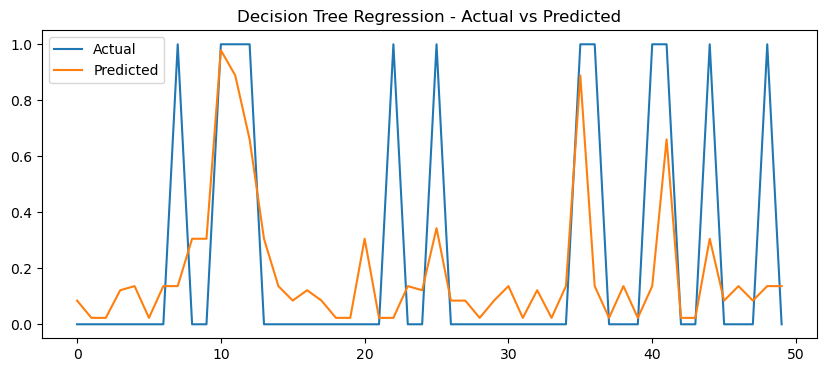

In [10]:
#LinearRegression

import pandas as pd#Import required libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('Bank Customer Churn Prediction.csv')

df['country'] = df['country'].replace({'Germany': 0, 'France': 1, 'Spain': 2})#Convert categorical columns
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})

# Step 4: Drop customer_id column
df = df.drop(['customer_id'], axis=1)

# Step 5: Define input features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Step 6: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Initialize and train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 8: Predict continuous values
y_pred_continuous = lr.predict(X_test)

# Step 9: Convert continuous output to binary (0 or 1)
y_pred_binary = np.where(y_pred_continuous >= 0.5, 1, 0)

# Step 10: Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_continuous))
print("R² Score:", r2_score(y_test, y_pred_continuous))
print("Accuracy Score (after rounding):", accuracy_score(y_test, y_pred_binary) * 100, "%")

plt.figure(figsize=(10, 4))#Visualize first 50 predictions
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.title('Decision Tree Regression - Actual vs Predicted')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15196\357274253.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['country'] = df['country'].replace(['Spain'], 2)
C:\Users\HP\AppData\Local\Temp\ipykernel_15196\357274253.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(['Male'], 1)


Mean Squared Error (MSE): 0.11342886997844483
R² Score: 0.2815853669556705
Accuracy Score (after rounding): 80.80000000000001 %


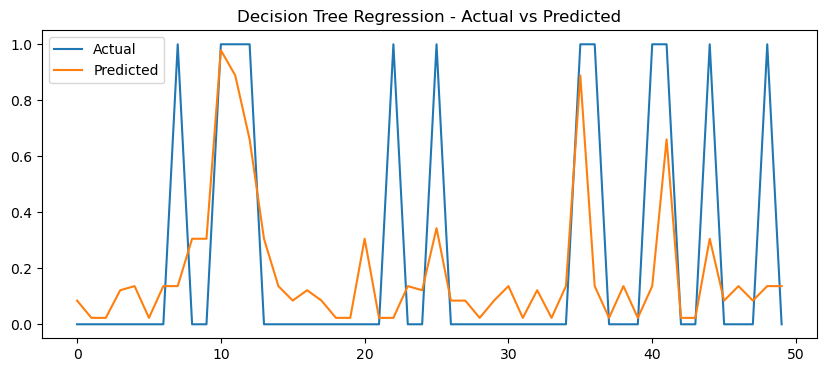

In [11]:
#Decision Tree Regressor
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('Bank Customer Churn Prediction.csv')

df['country'] = df['country'].replace(['Germany'], 0)
df['country'] = df['country'].replace(['France'], 1)
df['country'] = df['country'].replace(['Spain'], 2)
df['gender'] = df['gender'].replace(['Female'], 0)
df['gender'] = df['gender'].replace(['Male'], 1)

df = df.drop(['customer_id'], axis=1)#Drop non-numeric column

#Define features and target
X = df.drop('churn', axis=1)   # input features
y = df['churn']                # target: regression output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor(max_depth=4, random_state=42)# Create and train Decision Tree Regressor
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Convert continuous predictions to 0/1 (churn or not churn)
y_pred_binary = np.where(y_pred_continuous >= 0.5, 1, 0)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))  # closer to 1 means better
print("Accuracy Score (after rounding):", accuracy_score(y_test, y_pred_binary) * 100, "%")

plt.figure(figsize=(10, 4))#Visualize first 50 predictions
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.title('Decision Tree Regression - Actual vs Predicted')
plt.legend()
plt.show()


In [12]:
#RandomForestRegressor
import pandas as pd#Import libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

df = pd.read_csv('Bank Customer Churn Prediction.csv')
df['country'] = df['country'].replace(['Germany'], 0)# Convert categorical values
df['country'] = df['country'].replace(['France'], 1)
df['country'] = df['country'].replace(['Spain'], 2)
df['gender'] = df['gender'].replace(['Female'], 0)
df['gender'] = df['gender'].replace(['Male'], 1)

df = df.drop(['customer_id'], axis=1)

X = df.drop('churn', axis=1)  #Define X and y and X represents Features
y = df['churn']               #Target (0 or 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)#Train the RandomForestRegressor
model.fit(X_train, y_train)

y_pred_continuous = model.predict(X_test) # Predict and convert to 0/1, predictions like 0.2, 0.7
y_pred_binary = np.where(y_pred_continuous >= 0.5, 1, 0)  # convert to 0 or 1

print("Mean Squared Error:", mean_squared_error(y_test, y_pred_continuous))
print("R² Score:", r2_score(y_test, y_pred_continuous))
print("Accuracy Score (after rounding):", accuracy_score(y_test, y_pred_binary) * 100, "%")


C:\Users\HP\AppData\Local\Temp\ipykernel_15196\3628376186.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['country'] = df['country'].replace(['Spain'], 2)
C:\Users\HP\AppData\Local\Temp\ipykernel_15196\3628376186.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(['Male'], 1)


Mean Squared Error: 0.10664565
R² Score: 0.3245476612340096
Accuracy Score (after rounding): 85.65 %


In [ ]:
'''
supervised learning:
Regression Alogorithms:

#LinearRegression: 
Mean Squared Error: 0.133650692302136
R² Score: 0.15350815815580354
Accuracy Score (after rounding): 80.80000000000001 %

#Decision Tree Regressor: 
Mean Squared Error (MSE): 0.11342886997844483
R² Score: 0.2815853669556705
Accuracy Score (after rounding): 80.80000000000001 %
    
#RandomForestRegressor:
Mean Squared Error: 0.10664565
R² Score: 0.3245476612340096
Accuracy Score (after rounding): 85.65 %
'''